**CV Experiment - 5**

**Image registration with optimization technique**


Name: Saanvi Kulkarni

PRN: 1032210698

Class: A1

Batch: A4

**SIFT**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
img1 = cv2.imread('/content/g.jpg',0)
img1 = cv2.resize(img1, (600,600))

img2 = cv2.imread('/content/g2.png',0)
img2 = cv2.resize(img2, (600,600))

Text(0.5, 1.0, 'Target Image')

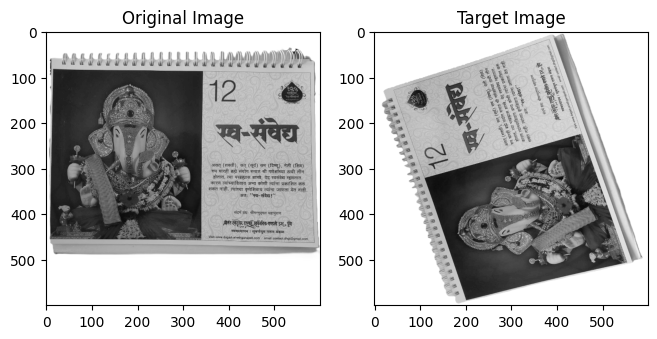

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Target Image')

**Keypoints and Descriptors**

In [ ]:
#SIFT
sift = cv2.xfeatures2d.SIFT_create()

In [ ]:
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

Descriptors:
 [[ 26.   7.   3. ...   0.   0.   0.]
 [  0.  11.  42. ...   0.   0.   9.]
 [  3.  70. 125. ...   0.   0.   0.]
 ...
 [  0.   2.  65. ...   0.   6.   2.]
 [  1.  58. 112. ...   0.   1.  45.]
 [  0. 112.  99. ...   0.   0.   1.]]


Text(0.5, 1.0, 'Keypoints')

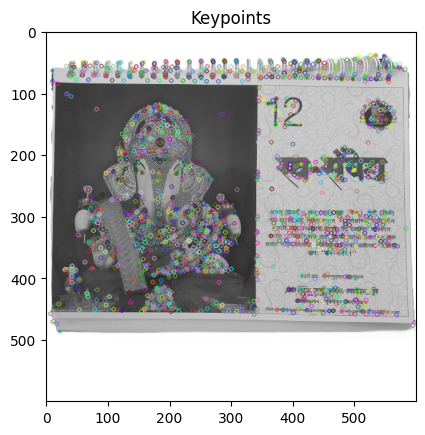

In [ ]:
img_1 = img1.copy()
img_1 = cv2.drawKeypoints(img1,keypoints_1,img_1)
print("Descriptors:\n",descriptors_1)
plt.imshow(img_1)
plt.title("Keypoints")

**Feature Matching**

In [ ]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key=lambda x:x.distance)

Text(0.5, 1.0, 'Feature Matching')

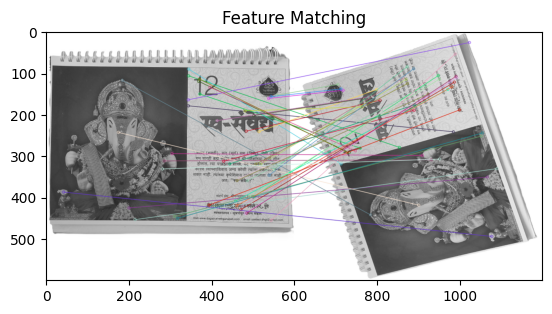

In [ ]:
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50],img2,flags=2)
plt.imshow(img3)
plt.title('Feature Matching')

**Homography Transform**

In [ ]:
src_pts = np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Find homography
H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
print("Homography Transform:\n",H)

Homography Transform:
 [[-2.86083642e-01  8.70197683e-01  1.31826643e+02]
 [-7.97223845e-01 -2.91538388e-01  6.18844693e+02]
 [ 1.51312819e-05 -1.15862785e-04  1.00000000e+00]]


In [ ]:
# Warp image using homography
img_warped = cv2.warpPerspective(img1, H, (img2.shape[1], img2.shape[0]))

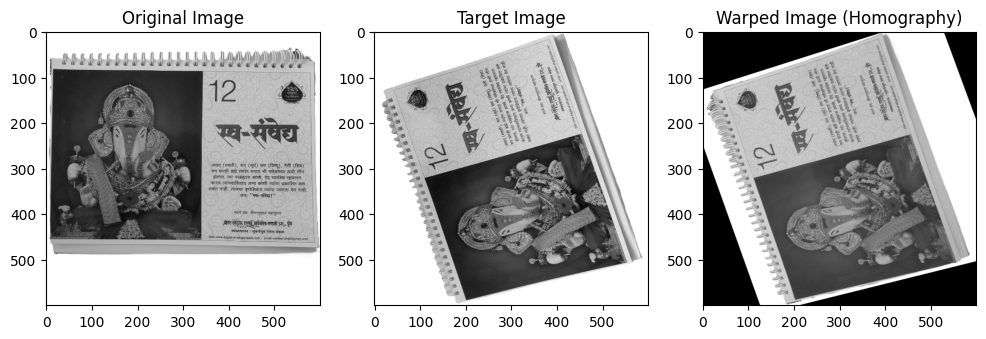

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('Target Image')
plt.subplot(1, 3, 3)
plt.imshow(img_warped, cmap='gray')
plt.title('Warped Image (Homography)')
plt.show()